In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn 
%matplotlib inline

In [34]:
h=60
n=100
a,b=10,10
theta=np.linspace(0,1,200)
prior=st.beta(a,b).pdf(theta)
likelihood=n*st.binom(n,theta).pmf(h)
post=prior*likelihood
post=post/np.sum(post)
post=len(theta)*post



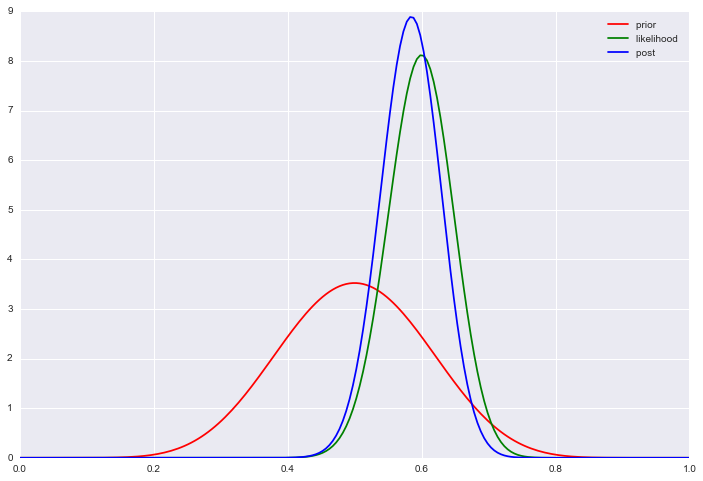

In [35]:
plt.figure(figsize=(12,8))
plt.plot(theta,prior,'r',label='prior ')
plt.plot(theta,likelihood,'g',label='likelihood ')
plt.plot(theta,post,'b',label='post ')
plt.legend(loc='best')
plt.show()


In [36]:
def MCMC_H(a,b,h,n,theta):
    if theta<0 or theta>1:
        return 0
    else:
        prior=st.beta(a,b).pdf(theta)
        likelihood=n*st.binom(n,theta).pmf(h)
        post=prior*likelihood
        return post

Proposal distribution is the Normal distribution with mean $\mu$ and variance $\sigma^2$. We get samples from the normal and check with the uniform random number whether to select or reject the new parameter.

In [37]:
h=60
n=100
a,b=10,10
theta=0.1
sigma=0.1
N_iteration=100000
all_theta=[]
accept=0
for i in range(N_iteration):
    theta_p=np.random.normal(theta,sigma)
    r=min(1,MCMC_H(a,b,h,n,theta_p)/MCMC_H(a,b,h,n,theta))
    p=np.random.uniform()
    if r>p:
        accept=accept+1
        theta=theta_p
    else:
        theta=theta
    all_theta.append(theta)

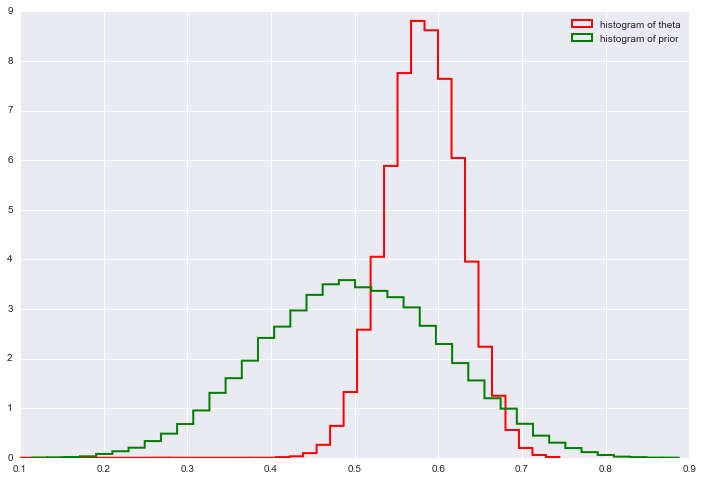

In [38]:
plt.figure(figsize=(12,8))
plt.hist(all_theta,40,normed='True',histtype='step',linewidth='2',color='red',label='histogram of theta')
plt.hist(st.beta(a,b).rvs(N_iteration),40,normed='True',histtype='step',linewidth='2',color='green',label='histogram of prior')
plt.legend(loc='best')
plt.show()

In [47]:
1/(0.02*512)*10**6*250

24414062.5